<a href="https://colab.research.google.com/github/Divya-d14/Aerofit-CaseStudy/blob/main/AerofitCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Aerofit - Descriptive Statistics & Probability**

**About Aerofit:**
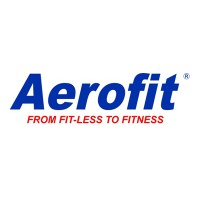


Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



**Business Problem Statement:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to **create a customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.
* For each AeroFit treadmill product, **construct two-way contingency tables and compute all conditional and marginal probabilities** along with their insights/impact on the business.



In [1]:
#importing basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading file to googlecollab and reading into the dataframe df

df=pd.read_csv('aerofit_treadmill.csv')
df.sample(10)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
88,KP481,23,Male,14,Partnered,3,3,38658,85
77,KP281,46,Female,16,Partnered,3,2,60261,47
143,KP781,23,Male,16,Single,4,5,58516,140
151,KP781,25,Male,16,Partnered,4,4,62251,160
140,KP781,22,Male,14,Single,4,3,48658,106
46,KP281,28,Male,14,Single,3,3,52302,103
40,KP281,26,Male,16,Single,3,3,50028,85
31,KP281,25,Male,16,Single,3,4,40932,113
66,KP281,36,Male,12,Single,4,3,44343,94


### **Checking the structure and characterestics of Data**

In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The data has 180 rows and 9 columns with no null/missing values in it.
The Product,Gender,MaritalStatus are object type where as the other columns Age,Education,Usage,Fitness,Income,Miles are integer datatype

### **Detecting outliers**

In [5]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


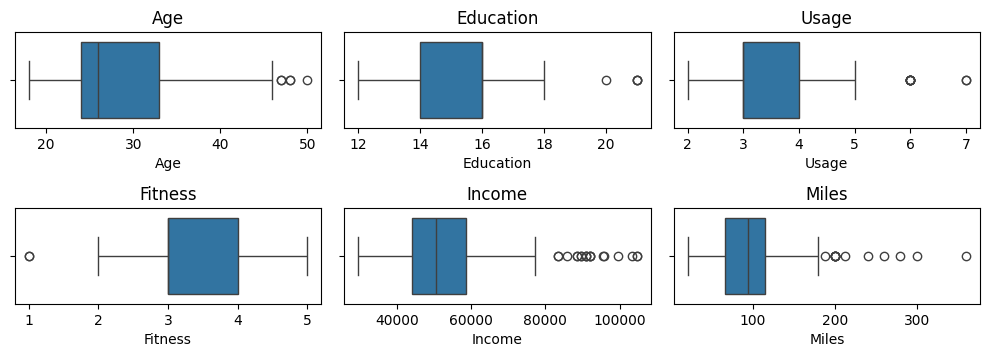

In [6]:
plt.figure(figsize=(10,5))
for i, column in enumerate(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

Income and Miles have more outliers while Age,Education,Usage,Fitness have very few.

### **Check if features like marital status, age have any effect on the product purchased**

In [7]:
# checking the effect of qualitative attributes(Gender,MaritalStatus) on product

df.groupby('Product')['Gender'].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: count, dtype: int64

In [8]:
df.groupby('Product')['MaritalStatus'].value_counts()

Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: count, dtype: int64

In [9]:
s=df.groupby(['Product','MaritalStatus'])['Gender'].value_counts()/len(df)
s.unstack()

Gender                   Female      Male
Product MaritalStatus                    
KP281   Partnered      0.150000  0.116667
        Single         0.072222  0.105556
KP481   Partnered      0.083333  0.116667
        Single         0.077778  0.055556
KP781   Partnered      0.022222  0.105556
        Single         0.016667  0.077778

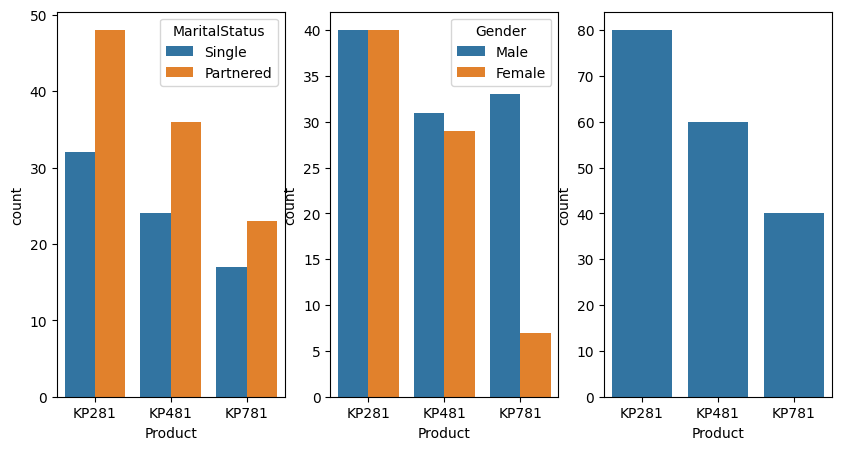

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.subplot(1,3,2)
sns.countplot(data=df,x='Product',hue='Gender')
plt.subplot(1,3,3)
sns.countplot(data=df,x='Product')
plt.show()

In [11]:
#to normalize

df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable','value'])['value'].value_counts()/len(df)

variable       value    
Gender         Female       0.422222
               Male         0.577778
MaritalStatus  Partnered    0.594444
               Single       0.405556
Product        KP281        0.444444
               KP481        0.333333
               KP781        0.222222
Name: count, dtype: float64



*   More partnered people(59.4%) and more males(57.7%)
    purchased the products in last 3 months.
*   Among 3 unique products, KP281 is the most used.
*   KP281 and KP481 is bought equally or almost equally by
    Male and Female where as more Male bought KP781.







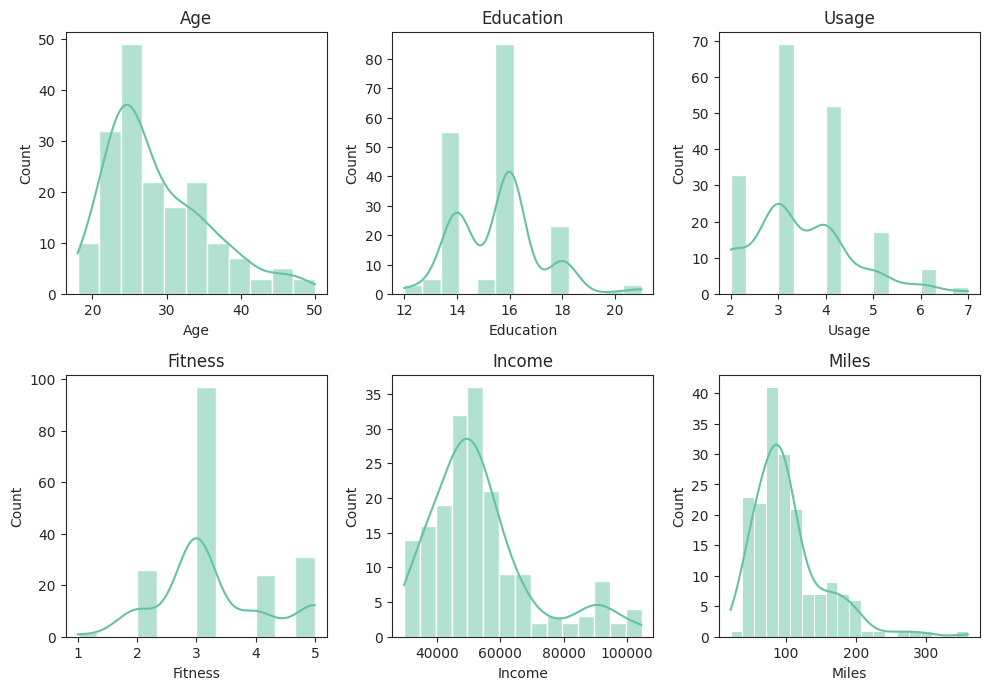

In [12]:
#understanding distribution of data on quantitative attributes(univariate analysis)

plt.figure(figsize=(10, 10))
sns.set_style('ticks')
sns.set_palette('Set2')

for i, column in enumerate(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

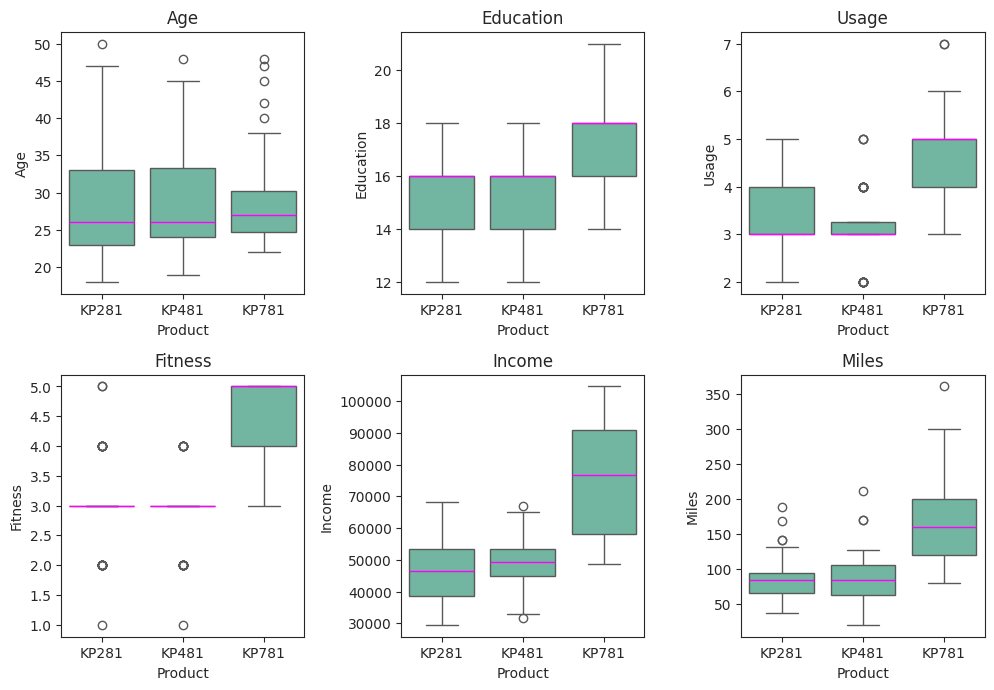

In [13]:
# checking effect of quantitative attributes for the product

plt.figure(figsize=(10, 10))
sns.set_style('ticks')
sns.set_palette('Set2')

for i, column in enumerate(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Product', y=column, medianprops={'color': 'magenta'})
    plt.title(column)

plt.tight_layout()
plt.show()

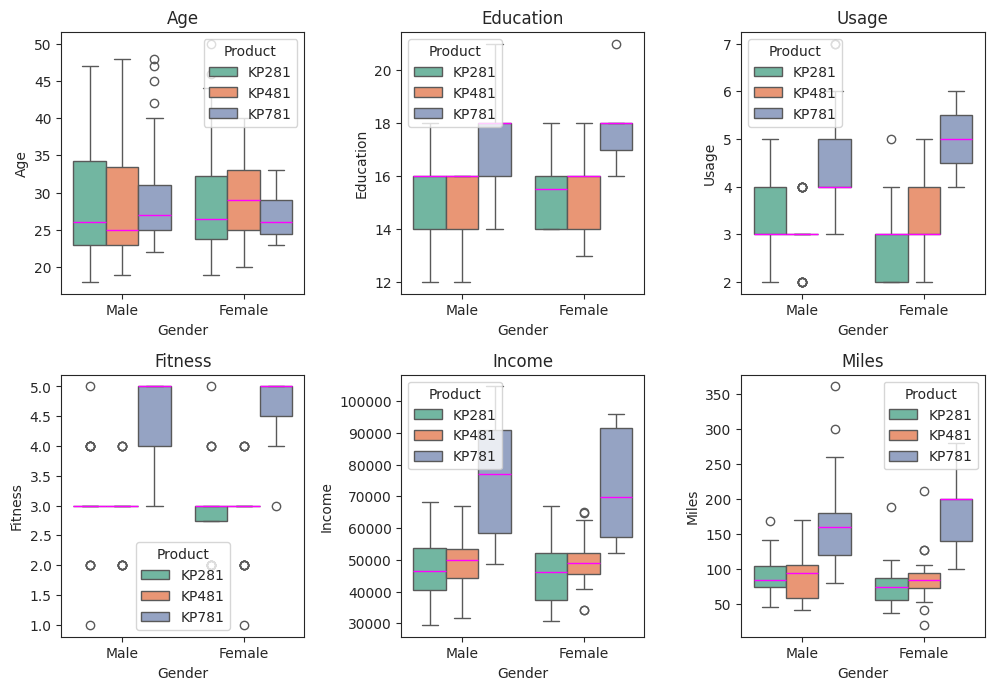

In [14]:
#bivariate analysis

plt.figure(figsize=(10, 10))
sns.set_style('ticks')
sns.set_palette('Set2')

for i, column in enumerate(['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Gender', y=column, hue='Product',medianprops={'color': 'magenta'})
    plt.title(column)

plt.tight_layout()
plt.show()

### **Representing the Probability**

**Marginal Probability**

In [15]:
df['Product'].value_counts()/len(df)

,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [16]:
df['Gender'].value_counts()/len(df)

,count
Gender,
Male,0.577778
Female,0.422222


In [17]:
df['MaritalStatus'].value_counts()/len(df)

,count
MaritalStatus,
Partnered,0.594444
Single,0.405556


**Contingency tables**

In [18]:
pd.crosstab(df['Product'],df['MaritalStatus'],normalize=True,margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [19]:
pd.crosstab(df['Product'],df['Gender'],normalize=True,margins=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


**Conditional Probability**

In [20]:
p_kp281_f = 0.222/0.422            #(probability of females purchased kp281/probability of total females)
p_kp481_f = 0.161/0.422
p_kp781_f = 0.039/0.422

p_kp281_m = 0.222/0.578
p_kp481_m = 0.172/0.578
p_kp781_m = 0.183/0.578

print("Probability of Purchasing KP281,KP481,KP781, when the customer is female is ",p_kp281_f,p_kp481_f,p_kp781_f)
print("Probability of Purchasing KP281,KP481,KP781, when the customer is male is ",p_kp281_m,p_kp481_m,p_kp781_m)

Probability of Purchasing KP281,KP481,KP781, when the customer is female is  0.5260663507109005 0.3815165876777251 0.0924170616113744
Probability of Purchasing KP281,KP481,KP781, when the customer is male is  0.384083044982699 0.2975778546712803 0.3166089965397924


In [21]:
p_kp281_p = 0.267/0.594            #(probability of partnered purchased kp281/probability of total partnered)
p_kp481_p = 0.200/0.594
p_kp781_p = 0.128/0.594

p_kp281_s = 0.178/0.406
p_kp481_s = 0.133/0.406
p_kp781_s = 0.094/0.406

print("Probability of Purchasing KP281,KP481,KP781, when the customer is partnered is ",p_kp281_f,p_kp481_f,p_kp781_f)
print("Probability of Purchasing KP281,KP481,KP781, when the customer is single  is ",p_kp281_m,p_kp481_m,p_kp781_m)

Probability of Purchasing KP281,KP481,KP781, when the customer is partnered is  0.5260663507109005 0.3815165876777251 0.0924170616113744
Probability of Purchasing KP281,KP481,KP781, when the customer is single  is  0.384083044982699 0.2975778546712803 0.3166089965397924


### **Check the correlation among different factors**

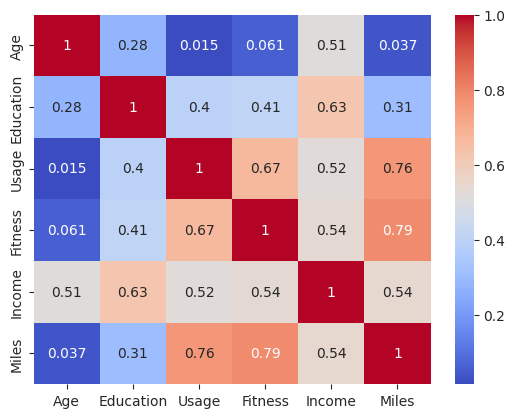

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

## **Customer profiling, Insights and Recommendations**

**KP281:**

* Age of customer mainly between 18 to 35 years with few
  between 35 to 50 years.
* Male and female customers exhibit gender-neutral  
  purchasing behavior.
* Annual Income of customer on an average ranges from $40000
  to $50000
* Weekly Usage of Customers - 2 to 4 times
* Fitness Scale Average - 3
* Weekly Running Mileage - 50 to 100 miles


**KP481:**

* Age of customer mainly between 18 to 35 years with few
  between 35 to 50 years.
* Male and female customers exhibit gender-neutral  
  purchasing behavior.
* Annual Income of customer on an average is $50000
* Weekly Usage of Customers - 2 to 4 times
* Fitness Scale Average - 3
* Weekly Running Mileage Average - 50 to 100 miles


**KP781:**

* Age of customer mainly between 25 to 50 years.
* Male Purchased more
* Annual Income of customer on an average ranges from   $70000  to $80000
* Weekly Usage of Customers - 4 to 5 times
* Fitness Scale Average - 5
* Weekly Running Mileage Average - 150 to 200 miles






**Insights:**

* Customers from age 12-50 purchased the treadmills mainly from  20-35 age.
* Customers whose age is less than 20 purchased only KP281,
  KP481 but not KP781.
* Most Females purchased KP281.
* Customers who purchased KP281 and KP481 mostly used 3  
  times a week where as customers  who purchased KP781 used 5 times a week.
* Customers with less than 16 yrs of education and on an
  income level of 50000 mostly purchased KP281 and KP481.
* Higher the education(>16), higher the income(>70000),
  higher the chance of purchasing
  KP781.
* Higher the fitness levels, higher the chance of purchasing
  KP781.
* Customer who ran 120 miles per week or more     mostly         purchased KP781.
* Female Customers who used treadmill less than 3 days purchased KP281 and who used 3-4 days mostly purchased KP481 and more than that purchased KP781


**Recommendations:**

* Marketing can be increased to KP781 specifically focussing on Female Customers.

* Prices can see and make more affordable.